# Classification

Qualitative variables take values in an unordered set C, such as: eye color ∈ {black, brown, blue, green}
    email∈ {spam, not-spam}
    
• Given a feature vector X and a qualitative response Y taking values in the set C, the classification task is to <br>build a function C(X) that takes as input the feature vector X and predicts its value for Y ; i.e. C(X) ∈ C. <br>
• Often we are more interested in estimating the probabilities that X belongs to each category in C.

## Use case - Credit Card Default

![Fig](imgs/lin_reg_024.png)

Suppose for the Default classification task that we code <br>
Y = 0 if No 1 if Yes. <br>

Can we simply perform a linear regression of Y on X and classify as Yes if Y-hat > 0.5? <br>

• In this case of a binary outcome, linear regression does a good job as a classifier, and is equivalent to linear<br>
discriminant analysis which we discuss later. <br>

• Since in the population E(Y |X = x) = Pr(Y = 1|X = x), we might think that regression is perfect for this task.

However, linear regression might produce probabilities less than zero or bigger than one. Logistic regression is more appropriate.

Now suppose we have a response variable with three possible values. A patient presents at the emergency room, and we must classify them according to their symptoms.<br>

Y = 1 if stroke; 2 if drug overdose; 3 if epileptic seizure.<br>

This coding suggests an ordering, and in fact implies that the difference between stroke and drug overdose is the same as between drug overdose and epileptic seizure.<br>

Linear regression is not appropriate here. Multiclass Logistic Regression or Discriminant Analysis are more appropriate

## Logistic Regression

Let’s write p(X) = Pr(Y = 1|X) for short and consider using balance to predict default. Logistic regression uses the form


![Fig](imgs/lin_reg_025.png)

(e ≈ 2.71828 is a mathematical constant [Euler’s number.])
It is easy to see that no matter what values β0, β1 or X take, p(X) will have values between 0 and 1.
A bit of rearrangement gives

![Fig](imgs/lin_reg_026.png)

This monotone transformation is called the log odds or logit transformation of p(X). (by log we mean natural log: ln.)

## Maximum likelihood

We use maximum likelihood to estimate the parameters.

![Fig](imgs/lin_reg_027.png)

This likelihood gives the probability of the observed zeros and ones in the data. We pick β0 and β1 to maximize the likelihood of the observed data

For example, upon running the logisitic regression on the credit card default problem we get the following -

![Fig](imgs/lin_reg_028.png)

Estimated probabilty of default with a balance of $1000

![Fig](imgs/lin_reg_029.png)

Estimated probabilty of default with a balance of $2000

![Fig](imgs/lin_reg_030.png)

### Logistic Regression with several variables

![Fig](imgs/lin_reg_031.png)

## Discriminant Analysis

Here the approach is to model the distribution of X in each of
the classes separately, and then use Bayes theorem to flip things
around and obtain Pr(Y |X).<br>
When we use normal (Gaussian) distributions for each class,
this leads to linear or quadratic discriminant analysis.<br>
However, this approach is quite general, and other distributions
can be used as well. We will focus on normal distributions.

Bayes' Theorem

![Fig](imgs/lin_reg_032.png)

One can write this slightly differently -

![Fig](imgs/lin_reg_033.png)

• fk(x) = Pr(X = x|Y = k) is the density for X in class k.
Here we will use normal densities for these, separately in
each class.<br>
• πk = Pr(Y = k) is the marginal or prior probability for
class k.<br>

### Why Discriminant Analysis

When the classes are well-separated, the parameter
estimates for the logistic regression model are surprisingly
unstable. Linear discriminant analysis does not suffer from
this problem.<br>
• If n is small and the distribution of the predictors X is
approximately normal in each of the classes, the linear
discriminant model is again more stable than the logistic
regression model.<br>
• Linear discriminant analysis is popular when we have more
than two response classes, because it also provides
low-dimensional views of the data.<br>

The Gaussian Density has the form -

![Fig](imgs/lin_reg_034.png)

Here µk is the mean, and σ2k the variance (in class k). 
We will assume that all the σk = σ are the same.<br>
Plugging this into Bayes formula, we get a rather complex
expression for pk(x) = Pr(Y = k|X = x):<br>

![Fig](imgs/lin_reg_035.png)

To classify at the value X = x, we need to see which of the
pk(x) is largest. Taking logs, and discarding terms that do not
depend on k, we see that this is equivalent to assigning x to the
class with the largest discriminant score:

![Fig](imgs/lin_reg_036.png)

Note that δk(x) is a linear function of x.
If there are K = 2 classes and π1 = π2 = 0.5, then one can see that the decision boundary is at<br>
x = (µ1 + µ2)/2

### Example

![Fig](imgs/lin_reg_037.png)

Once we have estimates ˆδk(x), we can turn these into estimates for class probabilities:
    
So classifying to the largest ˆδk(x) amounts to classifying to the class for which Pr( c Y = k|X = x) is largest.

![Fig](imgs/lin_reg_038.png)

For a two-class problem, one can show that for LDA

![Fig](imgs/lin_reg_039.png)

So it has the same form as logistic regression.

The difference is in how the parameters are estimated.
• Logistic regression uses the conditional likelihood based on
Pr(Y |X) (known as discriminative learning). <br>
• LDA uses the full likelihood based on Pr(X, Y ) (known as
generative learning). <br>
• Despite these differences, in practice the results are often
very similar.

Logistic regression is very popular for classification,
especially when K = 2.<br>
• LDA is useful when n is small, or the classes are well
separated, and Gaussian assumptions are reasonable. Also
when K > 2.

## Binary Classification with logistic regression

Ordinary linear regression assumes that the response variable is normally distributed. Normal distribution, or Gaussian distribution, is a function that describes the probability that an observation will have a value between any two real numbers. Normally distributed data is symmetrical; half of the values are greater than the mean and half of the values are less than the mean. The mean, median, and mode of normally distributed data are also equal. Many natural phenomena are approximately normally distributed. For instance, the height of people is normally distributed: most people are of average height, a few are tall, and a few are short. 

In some problems the response variable is not normally distributed. For instance, a coin toss can result in two outcomes: heads or tails.<br>
Bernoulli distribution describes the probability distribution of a random variable that can take the positive case with probability P or the negative case with probability 1 - P. If the response variable represents a probability, it must be constrained to the range [0, 1]. Linear regression assumes that a constant change in the value of a feature results in a constant change in the value of the response variable, an assumption that cannot hold if the value of the response variable represents a probability.

In logistic regression, the response variable describes the probability that the outcome is the positive case. If the response variable is equal to or exceeds a discrimination threshold, the positive class is predicted; otherwise, the negative class is predicted.

### Spam Filtering

Our first problem is a modern version of the canonical binary classification problem: spam filtering. In our version, however, we will classify spam and ham SMS messages rather than e-mail. We will extract tf-idf features from the messages

In [61]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('../datasets/SMSSpamCollection', delimiter='\t', header=None)
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [7]:
print('Number of spam messages: %s' % df[df[0] == 'spam'][0].count())
print('Number of ham messages: %s' % df[df[0] == 'ham'][0].count())

Number of spam messages: 747
Number of ham messages: 4825


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [13]:
X = df[1].values
y = df[0].values

In [14]:
# By default, train_test_split assigns 75% of the samples to the training set and allocates 
# the remaining 25% of the samples to the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
X_train

array(['I have 2 sleeping bags, 1 blanket and paper and  phone details. Anything else?',
       'K:)k..its good:)when are you going?',
       'Princess, i like to make love  &lt;#&gt;  times per night. Hope thats not a problem!',
       ...,
       'Eat at old airport road... But now 630 oredi... Got a lot of pple...',
       'If I get there before you after your ten billion calls and texts so help me god',
       'alright babe, justthought i\x92d sayhey! how u doin?nearly the endof me wk offdam nevamind!We will have 2Hook up sn if uwant m8? loveJen x.'],
      dtype=object)

In [23]:
y_train

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [17]:
X_train.shape

(4179,)

In [18]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [19]:
X_train

<4179x7503 sparse matrix of type '<class 'numpy.float64'>'
	with 55790 stored elements in Compressed Sparse Row format>

In [20]:
X_train.shape

(4179, 7503)

In [22]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(X_test.shape, predictions.shape)
for i, prediction in enumerate(predictions[:5]):
    print('Predicted: %s, message: %s' % (prediction,
      X_test[i]))

(1393, 7503) (1393,)
Predicted: ham, message:   (0, 7190)	0.5402654382792247
  (0, 6616)	0.2909364536439576
  (0, 4073)	0.31987519905654305
  (0, 3682)	0.6043182267660555
  (0, 2398)	0.3949032463387733
Predicted: ham, message:   (0, 6726)	0.41246605059147523
  (0, 6616)	0.26624234619426723
  (0, 6576)	0.2854945993147583
  (0, 6108)	0.3102233241593166
  (0, 4030)	0.26037565835568804
  (0, 3672)	0.5530248977979713
  (0, 3011)	0.23922913235815044
  (0, 1630)	0.33872788800824466
  (0, 945)	0.18879065702549436
Predicted: ham, message:   (0, 7469)	0.10269115144375009
  (0, 7245)	0.18224449087542738
  (0, 7212)	0.2849161953195871
  (0, 6979)	0.1773833777589743
  (0, 6965)	0.1785512839002398
  (0, 5749)	0.29880151767185836
  (0, 5029)	0.22275938441195167
  (0, 4883)	0.32801576792730536
  (0, 4526)	0.2954158317565044
  (0, 4321)	0.2936923495403374
  (0, 3937)	0.2890949991503397
  (0, 3753)	0.17077159320227983
  (0, 3373)	0.22380341042246246
  (0, 3357)	0.20679022857781026
  (0, 3245)	0.15349761

In [32]:
print(classifier.score(X_test, y_test))

0.9655419956927495


### Binary Class Performace Metrics

A variety of metrics exist for evaluating the performance of binary classifiers against trusted labels. The most common metrics are accuracy, precision, recall, F1 measure, and ROC AUC score. All of these measures depend on the concept of true positives, true negatives, false positives, and false negatives. Positive and negative refer to the classes. True and false denote whether the predicted class is the same as the true class.

A confusion matrix, or contingency table, can be used to visualize true and false positives and negatives.

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1209,    0],
       [  48,  136]])

In [25]:
pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,ham,spam,All
Actual,,,
ham,1209,0,1209
spam,48,136,184
All,1257,136,1393


True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. E.g. if actual class value indicates that this is ham and predicted class tells you the same thing.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this is spam and predicted class tells you the same thing.

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

False Positives (FP) – When actual class is no and predicted class is yes. E.g. if actual class says this is spam but predicted class tells you that this ham.

False Negatives (FN) – When actual class is yes but predicted class in no. E.g. if actual class value indicates that this is ham and predicted class tells you that this is spam.

Once you understand these four parameters then we can calculate Accuracy, Precision, Recall and F1 score.

Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.965 which means our model is approx. 96.5% accurate.

Accuracy = TP+TN/TP+FP+FN+TN

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all test messages that labeled as ham, how many are actually ham? High precision relates to the low false positive rate. We have got 0.9618 precision which is pretty good.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the messages that are truly ham, how many did we label? We have got recall of 1.0 which is good for this model as it’s above 0.5.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Sensitivity: 

If a person has a disease, how often will the test be positive (true positive rate)? 
Put another way, if the test is highly sensitive and the test result is negative you can be nearly certain that they don’t have disease. 
A Sensitive test helps rule out disease (when the result is negative). 

Sensitivity= true positives/(true positive + false negative)

Specificity: 

If a person does not have the disease how often will the test be negative (true negative rate)?
In other terms, if the test result for a highly specific test is positive you can be nearly certain that they actually have the disease.
Specificity=true negatives/(true negative + false positives)

In [39]:
TP = 1209
TN = 136
FP = 48
FN = 0

In [40]:
Accuracy = (TP+TN)/(TP+FP+FN+TN)
print(Accuracy)

0.9655419956927495


In [41]:
Precision = TP/(TP + FP)
print(Precision)

0.9618138424821002


In [42]:
Recall = TP/(TP+FN)
print(Recall)

1.0


In [43]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print(F1_Score)

0.9805352798053527


In [51]:
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print(scores)

[0.9557945  0.96052632 0.96052632 0.96407186 0.94371257]


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
from sklearn.metrics import auc, f1_score, roc_curve, precision_recall_fscore_support
precision, recall, fbeta_score, support = precision_recall_fscore_support(y_test, predictions)
print(precision[0], recall[0], fbeta_score[0])

0.9618138424821002 1.0 0.9805352798053527


A Receiver Operating Characteristic (ROC) curve, visualizes a classifier's performance. Unlike accuracy, the ROC curve is insensitive to datasets with unbalanced class proportions; unlike precision and recall, the ROC curve illustrates the classifier's performance for all values of the discrimination threshold. ROC curves plot the classifier's recall against its fall-out. Fall-out, or the false positive rate, is the number of false positives divided by the total number of negatives.

In [59]:
??roc_curve

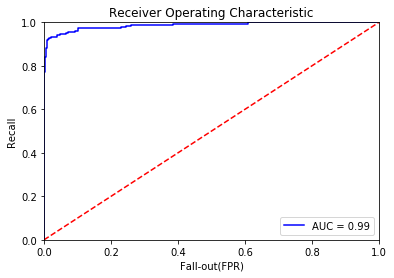

In [65]:

predictions = classifier.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(y_test,predictions[:,1], pos_label='spam')
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % 
  roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out(FPR)')
plt.show()

## Turing models with grid search

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,accuracy_score

In [69]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])
parameters = {
    'vect__max_df': (0.25, 0.5, 0.75),
    'vect__stop_words': ('english', None),
    'vect__max_features': (2500, 5000, 10000, None),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'vect__norm': ('l1', 'l2'),
    'clf__penalty': ('l1', 'l2'),
    'clf__C': (0.01, 0.1, 1, 10),
}

In [70]:
df = pd.read_csv('../datasets/SMSSpamCollection', delimiter='\t',header=None)
X = df[1].values
y = df[0].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1,
  verbose=1, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4608 out of 4608 | elapsed:  1.9min finished


Best score: 0.985
Best parameters set:


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('Precision:', precision_score(y_test, predictions))
    print('Recall:', recall_score(y_test, predictions))

tclf__C: 10
Accuracy: 0.9856424982053122
Precision: 0.9826589595375722
Recall: 0.9090909090909091
tclf__penalty: 'l2'
Accuracy: 0.9856424982053122
Precision: 0.9826589595375722
Recall: 0.9090909090909091
tvect__max_df: 0.5
Accuracy: 0.9856424982053122
Precision: 0.9826589595375722
Recall: 0.9090909090909091
tvect__max_features: 10000
Accuracy: 0.9856424982053122
Precision: 0.9826589595375722
Recall: 0.9090909090909091
tvect__ngram_range: (1, 2)
Accuracy: 0.9856424982053122
Precision: 0.9826589595375722
Recall: 0.9090909090909091
tvect__norm: 'l2'
Accuracy: 0.9856424982053122
Precision: 0.9826589595375722
Recall: 0.9090909090909091
tvect__stop_words: None
Accuracy: 0.9856424982053122
Precision: 0.9826589595375722
Recall: 0.9090909090909091
tvect__use_idf: True
Accuracy: 0.9856424982053122
Precision: 0.9826589595375722
Recall: 0.9090909090909091


## Multiclass Classification

In previous section, we learned to use logistic regression for binary classification. In many classification problems, however, there are more than two classes that are of interest. We might wish to predict the genres of songs from samples of audio, or to classify images of galaxies by their types. The goal of multi-class classification is to assign an instance to one of set of classes. scikit-learn uses a strategy called one-versus-all, or one-versus-the-rest, to support multi-class classification. One-versus-all classification uses one binary classifier for each of the possible classes. The class that is predicted with the greatest confidence is assigned to the instance. LogisticRegression supports multi-class classification using the one-versus-all strategy out of the box. Let's use LogisticRegression for a multi-class classification problem.

In this example, we will classify the sentiments of phrases taken from movie reviews in the Rotten Tomatoes dataset. Each phrase can be classified as one of the following sentiments: negative, somewhat negative, neutral, somewhat positive, or positive.

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('../datasets/movie-review/train.tsv', header=0, delimiter='\t')
X, y = df['Phrase'], df['Sentiment'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y,
  train_size=0.5)

pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])
parameters = {
    'vect__max_df': (0.25, 0.5),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'clf__C': (0.1, 1, 10),
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, 
  verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('t%s: %r' % (param_name, best_parameters[param_name]))



Fitting 3 folds for each of 24 candidates, totalling 72 fits


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   32.1s finished
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/line

Best score: 0.619
Best parameters set:
tclf__C: 10
tvect__max_df: 0.25
tvect__ngram_range: (1, 2)
tvect__use_idf: False


In [77]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [78]:
df['Sentiment'].nunique()

5

In [79]:
df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [94]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score
scoring = {'Accuracy': make_scorer(accuracy_score), 'F1_score': make_scorer(f1_score, average='micro')}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring=scoring, refit='F1_score', cv=5)
grid_search.fit(X_train, y_train)
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('t%s: %r' % (param_name, best_parameters[param_name]))


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.1min finished
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best score: 0.627
Best parameters set:
tclf__C: 10
tvect__max_df: 0.25
tvect__ngram_range: (1, 2)
tvect__use_idf: False


### Multiclass Performance metrics

In [95]:
predictions = grid_search.predict(X_test)
print('Accuracy: %s' % accuracy_score(y_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))
print('Classification Report:')
print(classification_report(y_test, predictions))

Accuracy: 0.636485966935794
Confusion Matrix:
[[ 1134  1683   647    69     8]
 [  897  6092  6157   548    40]
 [  210  3141 32639  3690   141]
 [   22   448  6417  8160  1307]
 [    3    36   474  2427  1640]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.32      0.39      3541
           1       0.53      0.44      0.48     13734
           2       0.70      0.82      0.76     39821
           3       0.55      0.50      0.52     16354
           4       0.52      0.36      0.43      4580

   micro avg       0.64      0.64      0.64     78030
   macro avg       0.56      0.49      0.52     78030
weighted avg       0.62      0.64      0.62     78030



While our classifier is an improvement over the baseline classifier, it frequently mistakes Somewhat Positive and Somewhat Negative for Neutral.

### Multi-label classfication and problem transformation

We discussed binary classification, in which each instance must be assigned to one of two classes, and multi-class classification, in which each instance must be assigned to one of a set of classes. The final type of classification problem that we will discuss is multi-label classification, in which each instance can be assigned a subset of the set of classes. Examples of multi-label classification include assigning tags to messages posted to a forum and classifying objects present in an image.

Problem transformation methods are techniques that cast the original multi-label problem as a set of single-label classification problems. The first problem transformation method that we will review converts each set of labels encountered in the training data to a single label. For example, consider a multi-label classification problem in which news articles must be assigned to one or more categories from a set. The following training data contains seven articles that can pertain to one or more of five categories:

![Fig](imgs/lin_reg_040.png)

![Fig](imgs/lin_reg_041.png)

A second problem transformation strategy is to train one binary classifier for each of the labels in the training set. Each classifier predicts whether or not the instance belongs to one label. Our example would require five binary classifiers; the first classifier will predict whether or not an instance should be classified as Local, the second classifier will predict whether or not an instance should be classified as US, and so on. The final prediction is the union of the predictions from all of the binary classifiers.

### Multi-label Classification performance metrics

Two of the most common performance metrics are hamming loss and Jaccard similarity. Hamming loss is the average fraction of incorrect labels. Note that hamming loss is a loss function and that the perfect score is 0. Jaccard similarity, or the Jaccard index, is the size of the intersection of the predicted labels and the true labels divided by the size of the union of the predicted and true labels. It ranges from 0 to 1, and 1 is the perfect score.

![Fig](imgs/lin_reg_042.png)

In [99]:
from sklearn.metrics import hamming_loss, jaccard_similarity_score

print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]),np.array([[0.0, 1.0],[1.0, 1.0]])))

0.0


In [102]:
print(hamming_loss(np.array([[0.0, 1.0], [1.0, 1.0]]),np.array([[1.0, 1.0],[0.0, 1.0]])))

0.5


In [103]:
print(jaccard_similarity_score(np.array([[0.0, 1.0], [1.0, 1.0]]),np.array([[0.0, 1.0], [1.0, 1.0]])))

1.0


## Example of Logisitc Regression (Binary Classification)

[Titanic Machine Learning From Diasaster](https://www.kaggle.com/c/titanic)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

![Fig](imgs/lin_reg_043.png)

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [59]:
# Read CSV train data file into DataFrame
train = pd.read_csv("../datasets/titanic/train.csv")

# Read CSV test data file into DataFrame
test = pd.read_csv("../datasets/titanic/test.csv")

# preview train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
train.shape, train.PassengerId.nunique()

((891, 12), 891)

In [61]:
y = train['Survived'].values
train = train.drop('Survived', axis=1)
train = train.drop('PassengerId', axis=1)
test = test.drop('PassengerId', axis=1)
train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)
data = pd.concat([train, test], axis=0)


In [62]:
data.shape

(1309, 9)

In [63]:
train.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
train.shape, test.shape

((891, 9), (418, 9))

In [8]:
train['Age'].value_counts(dropna=False)

NaN       177
 24.00     30
 22.00     27
 18.00     26
 28.00     25
 19.00     25
 30.00     25
 21.00     24
 25.00     23
 36.00     22
 29.00     20
 32.00     18
 26.00     18
 35.00     18
 27.00     18
 16.00     17
 31.00     17
 34.00     15
 23.00     15
 33.00     15
 20.00     15
 39.00     14
 17.00     13
 42.00     13
 40.00     13
 45.00     12
 38.00     11
 50.00     10
 2.00      10
 4.00      10
         ... 
 28.50      2
 63.00      2
 0.83       2
 30.50      2
 70.00      2
 57.00      2
 0.75       2
 13.00      2
 59.00      2
 10.00      2
 64.00      2
 40.50      2
 45.50      2
 32.50      2
 20.50      1
 24.50      1
 0.67       1
 70.50      1
 0.92       1
 74.00      1
 34.50      1
 14.50      1
 80.00      1
 12.00      1
 53.00      1
 36.50      1
 55.50      1
 66.00      1
 23.50      1
 0.42       1
Name: Age, Length: 89, dtype: int64

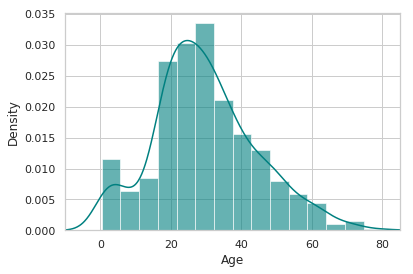

In [9]:
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [10]:
# mean age
print('The mean of train "Age" is %.2f' %(train["Age"].mean(skipna=True)))
print('The mean of train+test "Age" is %.2f' %(data["Age"].mean(skipna=True)))
# median age
print('The median of train "Age" is %.2f' %(train["Age"].median(skipna=True)))
print('The median of train+test "Age" is %.2f' %(data["Age"].median(skipna=True)))

The mean of train "Age" is 29.70
The mean of train+test "Age" is 29.88
The median of train "Age" is 28.00
The median of train+test "Age" is 28.00


In [11]:
data['Age'].fillna(28.00, inplace=True)

In [12]:
np.max(data['Age']), np.min(data['Age'])

(80.0, 0.17)

In [68]:
num_cols = ['Fare']
cat_cols = [col for col in list(train.columns) if col not in num_cols ]

In [14]:
data_num = data[num_cols]
data_cat = pd.DataFrame()

In [15]:
bins = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
cols = ['Age_'+str(x) for x in bins[1:]]
Age_bins = pd.get_dummies(pd.cut(data['Age'], bins))
Age_bins.columns = cols
Age_bins.shape

(1309, 17)

In [16]:
Age_bins.head()

,Age_10,Age_15,Age_20,Age_25,Age_30,Age_35,Age_40,Age_45,Age_50,Age_55,Age_60,Age_65,Age_70,Age_75,Age_80,Age_85,Age_90
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [17]:
data['Cabin'].fillna('UNK_Cabin', inplace=True)

In [18]:
data['Embarked'].value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: Embarked, dtype: int64

In [19]:
data['Embarked'].fillna('S', inplace=True)

In [20]:
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Cabin       0
Embarked    0
dtype: int64

In [21]:
data1 = data.dropna()

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


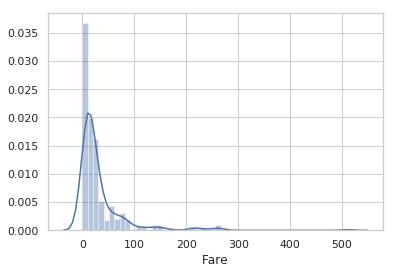

In [22]:
sns.distplot(data1['Fare'])

In [23]:
np.nanmedian(data['Fare']), np.nanmean(data['Fare'])

(14.4542, 33.29547928134557)

In [24]:
data['Fare'].fillna(np.nanmedian(data['Fare']), inplace=True)

In [25]:
data['Fare1'] = np.log1p(np.log1p(np.log1p(data['Fare']+50)))

In [26]:
np.max(data['Fare']), np.min(data['Fare'])

(512.3292, 0.0)

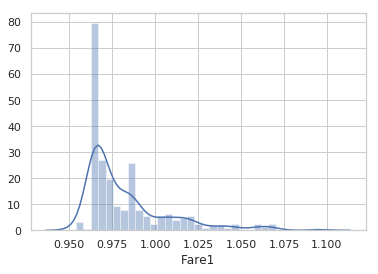

In [27]:
sns.distplot(data['Fare1'])

In [28]:
bins = [i for i in np.arange(515, step=5)]
cols = ['Fare_'+str(x) for x in bins[1:]]
print(cols, len(cols))
Fare_bins = pd.get_dummies(pd.cut(data['Fare'], bins), columns=cols)
Fare_bins.columns = cols
Fare_bins.shape

['Fare_5', 'Fare_10', 'Fare_15', 'Fare_20', 'Fare_25', 'Fare_30', 'Fare_35', 'Fare_40', 'Fare_45', 'Fare_50', 'Fare_55', 'Fare_60', 'Fare_65', 'Fare_70', 'Fare_75', 'Fare_80', 'Fare_85', 'Fare_90', 'Fare_95', 'Fare_100', 'Fare_105', 'Fare_110', 'Fare_115', 'Fare_120', 'Fare_125', 'Fare_130', 'Fare_135', 'Fare_140', 'Fare_145', 'Fare_150', 'Fare_155', 'Fare_160', 'Fare_165', 'Fare_170', 'Fare_175', 'Fare_180', 'Fare_185', 'Fare_190', 'Fare_195', 'Fare_200', 'Fare_205', 'Fare_210', 'Fare_215', 'Fare_220', 'Fare_225', 'Fare_230', 'Fare_235', 'Fare_240', 'Fare_245', 'Fare_250', 'Fare_255', 'Fare_260', 'Fare_265', 'Fare_270', 'Fare_275', 'Fare_280', 'Fare_285', 'Fare_290', 'Fare_295', 'Fare_300', 'Fare_305', 'Fare_310', 'Fare_315', 'Fare_320', 'Fare_325', 'Fare_330', 'Fare_335', 'Fare_340', 'Fare_345', 'Fare_350', 'Fare_355', 'Fare_360', 'Fare_365', 'Fare_370', 'Fare_375', 'Fare_380', 'Fare_385', 'Fare_390', 'Fare_395', 'Fare_400', 'Fare_405', 'Fare_410', 'Fare_415', 'Fare_420', 'Fare_425',

(1309, 102)

In [29]:
Fare_bins.head()

,Fare_5,Fare_10,Fare_15,Fare_20,Fare_25,Fare_30,Fare_35,Fare_40,Fare_45,Fare_50,...,Fare_465,Fare_470,Fare_475,Fare_480,Fare_485,Fare_490,Fare_495,Fare_500,Fare_505,Fare_510
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from tqdm import tqdm_notebook
data_cat = pd.DataFrame()
for col in tqdm_notebook(cat_cols):
    data[col] = data[col].map(lambda x: col+str(x))
    mydf = pd.get_dummies(data[col])
    if len(data_cat) == 0:
        data_cat = mydf
    else:
        data_cat = pd.concat([data_cat, mydf], axis=1)

In [31]:
data_cat.shape

(1309, 1237)

In [32]:
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Fare1       0
dtype: int64

In [33]:
data_num = data[['Fare']]

In [34]:
data_num['Fare'] = data_num['Fare'].apply(np.log1p)

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
data2 = data_cat.copy()
data2['Fare'] = data_num['Fare']
data2 = pd.concat([data2, Age_bins], axis=1)
data2 = pd.concat([data2, Fare_bins], axis=1)

In [36]:
data2.shape

(1309, 1357)

In [37]:
from scipy.sparse import csr_matrix, hstack

In [38]:
data_mat_sparse = csr_matrix(data2.values)

In [39]:
data_mat_sparse.shape

(1309, 1357)

In [40]:
data_mat_train = data_mat_sparse[:len(train)]
data_mat_test = data_mat_sparse[len(train):]

In [41]:
from sklearn.model_selection import train_test_split
X = data_mat_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
model.score(X_val, y_val)

0.7988826815642458

Train/Test split results:
LogisticRegression accuracy is 0.799
LogisticRegression log_loss is 0.435
LogisticRegression auc is 0.874


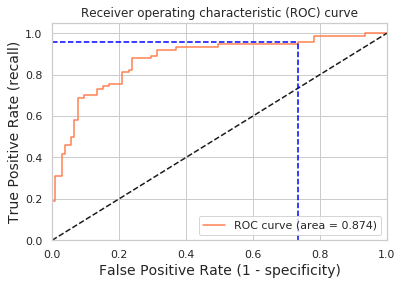

Using a threshold of 0.083 guarantees a sensitivity of 0.959 and a specificity of 0.267, i.e. a false positive rate of 73.33%.


In [45]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, accuracy_score

y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
print('Train/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_val, y_pred))
print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(y_val, y_pred_proba))
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Lets drop Fare and check

In [46]:
data2 = data_cat.copy()
# data2['Fare'] = data_num['Fare']
data2 = pd.concat([data2, Age_bins], axis=1)
# data2 = pd.concat([data2, Fare_bins], axis=1)
data_mat_sparse = csr_matrix(data2.values)
data_mat_train = data_mat_sparse[:len(train)]
data_mat_test = data_mat_sparse[len(train):]

from sklearn.model_selection import train_test_split
X = data_mat_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Train/Test split results:
LogisticRegression accuracy is 0.793
LogisticRegression log_loss is 0.442
LogisticRegression auc is 0.870


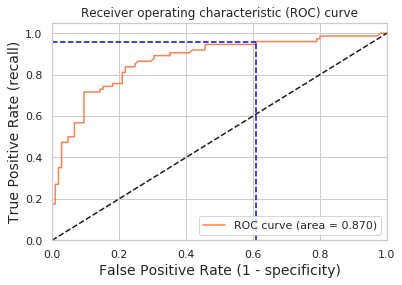

Using a threshold of 0.094 guarantees a sensitivity of 0.959 and a specificity of 0.390, i.e. a false positive rate of 60.95%.


In [47]:
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
print('Train/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_val, y_pred))
print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(y_val, y_pred_proba))
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### Feature ranking with recursive feature elimination and cross-validation
RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

In [48]:
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)



RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

Optimal number of features: 332
Selected features: ['Pclass1', 'Pclass2', 'Pclass3', 'Sexfemale', 'Sexmale', 'Age0.42', 'Age0.67', 'Age0.83', 'Age0.92', 'Age1.0', 'Age10.0', 'Age12.0', 'Age14.5', 'Age15.0', 'Age18.0', 'Age2.0', 'Age21.0', 'Age27.0', 'Age28.0', 'Age3.0', 'Age30.0', 'Age30.5', 'Age32.0', 'Age35.0', 'Age36.0', 'Age36.5', 'Age37.0', 'Age4.0', 'Age41.0', 'Age42.0', 'Age43.0', 'Age46.0', 'Age47.0', 'Age48.0', 'Age5.0', 'Age54.0', 'Age57.0', 'Age61.0', 'Age63.0', 'Age64.0', 'Age65.0', 'Age70.0', 'Age71.0', 'Age8.0', 'Age80.0', 'SibSp0', 'SibSp1', 'SibSp2', 'SibSp3', 'SibSp5', 'SibSp8', 'Parch1', 'Parch4', 'Parch5', 'Ticket110465', 'Ticket110564', 'Ticket111369', 'Ticket111426', 'Ticket111427', 'Ticket111428', 'Ticket112277', 'Ticket113051', 'Ticket113055', 'Ticket113056', 'Ticket113501', 'Ticket113503', 'Ticket113509', 'Ticket113760', 'Ticket113773', 'Ticket113781', 'Ticket113784', 'Ticket113786', 'Ticket113788', 'Ticket113794', 'Ticket113804', 'Ticket113806', 'Ticket11668', 

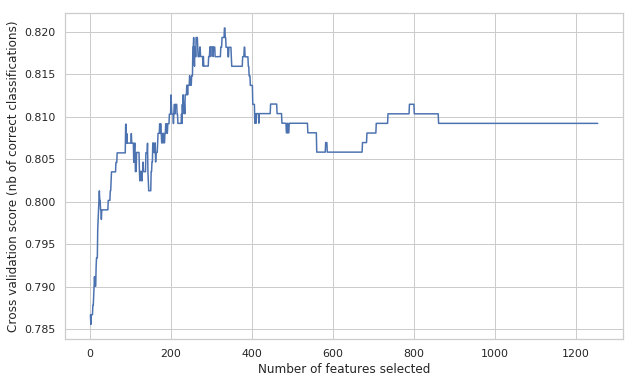

In [49]:
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(data2.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [50]:
### Adding Feature Interactions

In [69]:
data.shape

(1309, 9)

In [70]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [72]:
cat_cols

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']

In [73]:
new_cat_cols = []
for i, col1 in tqdm_notebook(enumerate(cat_cols)):
    print(i)
    for col2 in cat_cols[(i+1):]:
        col = col1 + '_' + col2
        data[col] = data[col1].astype('str') + '_' + data[col2].astype('str')
        new_cat_cols.append(col)

0
1
2
3
4
5
6
7


In [74]:
new_cat_cols

['Pclass_Sex',
 'Pclass_Age',
 'Pclass_SibSp',
 'Pclass_Parch',
 'Pclass_Ticket',
 'Pclass_Cabin',
 'Pclass_Embarked',
 'Sex_Age',
 'Sex_SibSp',
 'Sex_Parch',
 'Sex_Ticket',
 'Sex_Cabin',
 'Sex_Embarked',
 'Age_SibSp',
 'Age_Parch',
 'Age_Ticket',
 'Age_Cabin',
 'Age_Embarked',
 'SibSp_Parch',
 'SibSp_Ticket',
 'SibSp_Cabin',
 'SibSp_Embarked',
 'Parch_Ticket',
 'Parch_Cabin',
 'Parch_Embarked',
 'Ticket_Cabin',
 'Ticket_Embarked',
 'Cabin_Embarked']

In [75]:
cat_cols = cat_cols + new_cat_cols

In [76]:
from tqdm import tqdm_notebook
data_cat = pd.DataFrame()
for col in tqdm_notebook(cat_cols):
    data[col] = data[col].map(lambda x: col+str(x))
    mydf = pd.get_dummies(data[col])
    if len(data_cat) == 0:
        data_cat = mydf
    else:
        data_cat = pd.concat([data_cat, mydf], axis=1)

In [78]:
data2 = data_cat.copy()
# data2['Fare'] = data_num['Fare']
data2 = pd.concat([data2, Age_bins], axis=1)
# data2 = pd.concat([data2, Fare_bins], axis=1)
data_mat_sparse = csr_matrix(data2.values)
data_mat_train = data_mat_sparse[:len(train)]
data_mat_test = data_mat_sparse[len(train):]

from sklearn.model_selection import train_test_split
X = data_mat_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Train/Test split results:
LogisticRegression accuracy is 0.816
LogisticRegression log_loss is 0.443
LogisticRegression auc is 0.883


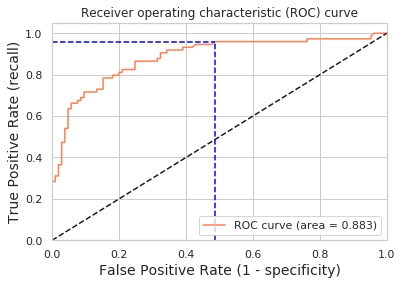

Using a threshold of 0.072 guarantees a sensitivity of 0.959 and a specificity of 0.514, i.e. a false positive rate of 48.57%.


In [79]:
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
print('Train/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_val, y_pred))
print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(y_val, y_pred_proba))
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Optimal number of features: 4180
Selected features: ['Pclass1', 'Pclass2', 'Pclass3', 'Sexfemale', 'Sexmale', 'Age0.42', 'Age0.67', 'Age0.75', 'Age0.83', 'Age0.92', 'Age1.0', 'Age10.0', 'Age11.0', 'Age12.0', 'Age13.0', 'Age14.0', 'Age14.5', 'Age15.0', 'Age18.0', 'Age2.0', 'Age20.0', 'Age21.0', 'Age22.0', 'Age25.0', 'Age27.0', 'Age28.0', 'Age28.5', 'Age29.0', 'Age3.0', 'Age30.0', 'Age30.5', 'Age32.0', 'Age33.0', 'Age34.0', 'Age35.0', 'Age36.0', 'Age36.5', 'Age37.0', 'Age38.0', 'Age4.0', 'Age40.5', 'Age41.0', 'Age42.0', 'Age43.0', 'Age44.0', 'Age45.5', 'Age46.0', 'Age47.0', 'Age48.0', 'Age5.0', 'Age50.0', 'Age54.0', 'Age57.0', 'Age58.0', 'Age6.0', 'Age61.0', 'Age62.0', 'Age63.0', 'Age64.0', 'Age65.0', 'Age70.0', 'Age71.0', 'Age8.0', 'Age80.0', 'SibSp0', 'SibSp1', 'SibSp2', 'SibSp3', 'SibSp5', 'SibSp8', 'Parch0', 'Parch1', 'Parch2', 'Parch3', 'Parch4', 'Ticket110413', 'Ticket110465', 'Ticket110564', 'Ticket111240', 'Ticket111369', 'Ticket111426', 'Ticket111427', 'Ticket111428', 'Ticket112

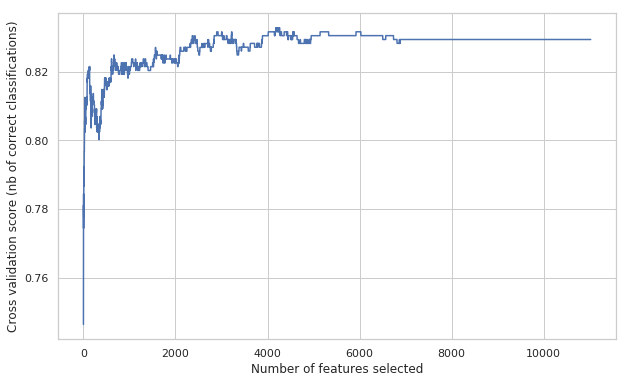

In [80]:
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(data2.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()